# Daily Shelter Occupancy

[Introduction here]


## 1. Prepare Problem
### a) Load libraries

In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 10
sns.set_style('whitegrid')

In [3]:
# View multiple statements at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### b) Load dataset

In [4]:
json1 = pd.read_json('C:\\Users\\ojalon\\Dropbox\\PYTHON PROJECTS\\daily_shelter_occupancy\\dataset\\extractssha.json')
json2 = pd.read_json('C:\\Users\\ojalon\\Dropbox\\PYTHON PROJECTS\\daily_shelter_occupancy\\dataset\\SMIS_Daily_Occupancy_2017.json')

### c) Merge JSON files

In [5]:
# Drop the ID column from json1 as there isn't the same column in json2 and it isn't really needed
json1 = json1.drop('id', 1)

# Row bind (append the dataframes)
df = json2.append(json1, ignore_index=True, )

## 2. Summarize Data
### a) Descriptive statistics

Let's check to see what the data looks like from each JSON file

In [6]:
# json 1 file

json1.head(10)

,CAPACITY,FACILITY_NAME,OCCUPANCY,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_NAME,SECTOR,SHELTER_ADDRESS,SHELTER_CITY,SHELTER_NAME,SHELTER_POSTAL_CODE,SHELTER_PROVINCE
0,330,COSTI Quality Suites (Families),325,2018-01-01,COSTI Immigrant Services,COSTI - Quality Suites Family Program,Families,100 Lippincott Street,Toronto,COSTI Reception Centre,M5S 2P1,ON
1,25,COSTI Quality Suites (Singles),16,2018-01-01,COSTI Immigrant Services,COSTI - Quality Suites Singles Refugee Program,Co-ed,100 Lippincott Street,Toronto,COSTI Reception Centre,M5S 2P1,ON
2,400,COSTI Radisson Hotel,319,2018-01-01,COSTI Immigrant Services,COSTI Radisson Hotel Family Program.,Families,100 Lippincott Street,Toronto,COSTI Reception Centre,M5S 2P1,ON
3,16,COSTI Reception Centre,16,2018-01-01,COSTI Immigrant Services,COSTI Reception Ctr CITY Program,Co-ed,100 Lippincott Street,Toronto,COSTI Reception Centre,M5S 2P1,ON
4,17,Christie Ossington Men's Hostel,5,2018-01-01,Christie Ossington Neighbourhood Centre,Christie Ossington Extreme Weather Program,Men,973 Lansdowne Avenue,Toronto,Christie Ossington Men's Hostel,M6H 3Z5,ON
5,63,Christie Ossington Men's Hostel,63,2018-01-01,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,Men,973 Lansdowne Avenue,Toronto,Christie Ossington Men's Hostel,M6H 3Z5,ON
6,30,Christie Ossington South Hostel,30,2018-01-01,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel South,Men,973 Lansdowne Avenue,Toronto,Christie Ossington Men's Hostel,M6H 3Z5,ON
7,4,CR Welcome Centre(Singles),0,2018-01-01,"Christie Refugee Welcome Centre, Inc.",Christe Refugee Welcome Centre - Singles,Women,43 Christie Street,Toronto,Christie Refugee Welcome Centre,M6G 3B1,ON
8,72,Christie Refugee Welcome Centre,72,2018-01-01,"Christie Refugee Welcome Centre, Inc.",Christie Refugee Welcome Ctr - Settlement and ...,Families,43 Christie Street,Toronto,Christie Refugee Welcome Centre,M6G 3B1,ON
9,60,Birchmount Res 1673 Kingston Rd,51,2018-01-01,City of Toronto,Birchmount Residence,Men,1673 Kingston Road,Toronto,Birchmount Residence,None,ON


In [7]:
json2.head(10)

,CAPACITY,FACILITY_NAME,OCCUPANCY,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_NAME,SECTOR,SHELTER_ADDRESS,SHELTER_CITY,SHELTER_NAME,SHELTER_POSTAL_CODE,SHELTER_PROVINCE
0,16.0,COSTI Reception Centre,16,2017-01-01,COSTI Immigrant Services,COSTI Reception Ctr CITY Program,Co-ed,100 Lippincott Street,Toronto,COSTI Reception Centre,M5S 2P1,ON
1,17.0,Christie Ossington Men's Hostel,13,2017-01-01,Christie Ossington Neighbourhood Centre,Christie Ossington Extreme Weather Program,Men,973 Lansdowne Avenue,Toronto,Christie Ossington Men's Hostel,M6H 3Z5,ON
2,63.0,Christie Ossington Men's Hostel,63,2017-01-01,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,Men,973 Lansdowne Avenue,Toronto,Christie Ossington Men's Hostel,M6H 3Z5,ON
3,70.0,Christie Refugee Welcome Centre,66,2017-01-01,"Christie Refugee Welcome Centre, Inc.",Christie Refugee Welcome Ctr - Settlement and ...,Families,43 Christie Street,Toronto,Christie Refugee Welcome Centre,M6G 3B1,ON
4,60.0,Birchmount Res 1673 Kingston Rd,58,2017-01-01,City of Toronto,Birchmount Residence,Men,1673 Kingston Road,Toronto,Birchmount Residence,None,ON
5,160.0,Birkdale Residence,168,2017-01-01,City of Toronto,Birkdale Residence - Bedded Program,Families,1229 Ellesmere Road,Toronto,Birkdale Residence,M1P 4V8,ON
6,150.0,Birkdale Residence Motel (Fam),119,2017-01-01,City of Toronto,Birkdale Residence - Toronto Plaza Hotel Program,Families,1229 Ellesmere Road,Toronto,Birkdale Residence,M1P 4V8,ON
7,28.0,Downsview Dells 1651 Sheppard W,23,2017-01-01,City of Toronto,Downsview Dells Bedded Program,Men,1651 Sheppard Ave West,Toronto,Downsview Dells,None,ON
8,0.0,Family Residence - AL site,8,2017-01-01,City of Toronto,Family Residence - AL Site (Internal Referral ...,Families,4222 Kingston Road,Toronto,Family Residence,M1E 2M6,ON
9,40.0,Family Residence - CoEd Building,14,2017-01-01,City of Toronto,Family Residence - Co-Ed,Co-ed,4222 Kingston Road,Toronto,Family Residence,M1E 2M6,ON


Let's review the shape of the two dataframes and the variable datatypes.

In [8]:
json1.shape

(36106, 12)

In [9]:
json2.shape

(38700, 12)

And let's look at the datatypes

In [10]:
json1.dtypes

CAPACITY                int64
FACILITY_NAME          object
OCCUPANCY               int64
OCCUPANCY_DATE         object
ORGANIZATION_NAME      object
PROGRAM_NAME           object
SECTOR                 object
SHELTER_ADDRESS        object
SHELTER_CITY           object
SHELTER_NAME           object
SHELTER_POSTAL_CODE    object
SHELTER_PROVINCE       object
dtype: object

In [11]:
json2.dtypes

CAPACITY               float64
FACILITY_NAME           object
OCCUPANCY                int64
OCCUPANCY_DATE          object
ORGANIZATION_NAME       object
PROGRAM_NAME            object
SECTOR                  object
SHELTER_ADDRESS         object
SHELTER_CITY            object
SHELTER_NAME            object
SHELTER_POSTAL_CODE     object
SHELTER_PROVINCE        object
dtype: object

Now let's do the same with the merged dataframe

In [12]:
df.head(10)

,CAPACITY,FACILITY_NAME,OCCUPANCY,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_NAME,SECTOR,SHELTER_ADDRESS,SHELTER_CITY,SHELTER_NAME,SHELTER_POSTAL_CODE,SHELTER_PROVINCE
0,16.0,COSTI Reception Centre,16,2017-01-01,COSTI Immigrant Services,COSTI Reception Ctr CITY Program,Co-ed,100 Lippincott Street,Toronto,COSTI Reception Centre,M5S 2P1,ON
1,17.0,Christie Ossington Men's Hostel,13,2017-01-01,Christie Ossington Neighbourhood Centre,Christie Ossington Extreme Weather Program,Men,973 Lansdowne Avenue,Toronto,Christie Ossington Men's Hostel,M6H 3Z5,ON
2,63.0,Christie Ossington Men's Hostel,63,2017-01-01,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,Men,973 Lansdowne Avenue,Toronto,Christie Ossington Men's Hostel,M6H 3Z5,ON
3,70.0,Christie Refugee Welcome Centre,66,2017-01-01,"Christie Refugee Welcome Centre, Inc.",Christie Refugee Welcome Ctr - Settlement and ...,Families,43 Christie Street,Toronto,Christie Refugee Welcome Centre,M6G 3B1,ON
4,60.0,Birchmount Res 1673 Kingston Rd,58,2017-01-01,City of Toronto,Birchmount Residence,Men,1673 Kingston Road,Toronto,Birchmount Residence,None,ON
5,160.0,Birkdale Residence,168,2017-01-01,City of Toronto,Birkdale Residence - Bedded Program,Families,1229 Ellesmere Road,Toronto,Birkdale Residence,M1P 4V8,ON
6,150.0,Birkdale Residence Motel (Fam),119,2017-01-01,City of Toronto,Birkdale Residence - Toronto Plaza Hotel Program,Families,1229 Ellesmere Road,Toronto,Birkdale Residence,M1P 4V8,ON
7,28.0,Downsview Dells 1651 Sheppard W,23,2017-01-01,City of Toronto,Downsview Dells Bedded Program,Men,1651 Sheppard Ave West,Toronto,Downsview Dells,None,ON
8,0.0,Family Residence - AL site,8,2017-01-01,City of Toronto,Family Residence - AL Site (Internal Referral ...,Families,4222 Kingston Road,Toronto,Family Residence,M1E 2M6,ON
9,40.0,Family Residence - CoEd Building,14,2017-01-01,City of Toronto,Family Residence - Co-Ed,Co-ed,4222 Kingston Road,Toronto,Family Residence,M1E 2M6,ON


In [13]:
df.tail(10)

,CAPACITY,FACILITY_NAME,OCCUPANCY,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_NAME,SECTOR,SHELTER_ADDRESS,SHELTER_CITY,SHELTER_NAME,SHELTER_POSTAL_CODE,SHELTER_PROVINCE
74796,14.0,Tor. Comm. Hostel 191 Spadina Rd,13,2018-12-15,Toronto Community Hostel,TCH (program),Families,191 Spadina Road,Toronto,Toronto Community Hostel,M5R 2T9,ON
74797,35.0,Turning Point Youth Services,35,2018-12-15,Turning Point Youth Services,Turning Point Youth Services Shelter,Youth,95 Wellesley St. E.,Toronto,Turning Point Youth Services,M4Y 2X9,ON
74798,85.0,U. Settlement OOTC-23 Grange Rd,81,2018-12-15,University Settlement,University Settlement - Out of the Cold,Co-ed,23 Grange Road,Toronto,Univ Settlement House - OOTC,M5T 1C3,ON
74799,106.0,Red Door - 1430 Gerrad St E,102,2018-12-15,WoodGreen Red Door Family Shelter,Red Door - Family Shelter,Families,875 Queen St E,Toronto,Red Door Queen Street,M4M 1J2,ON
74800,40.0,Yhouse - Vanauley,40,2018-12-15,YMCA of Greater Toronto,YMCA House-Vanauley,Youth,485 Queen St West,Toronto,YMCA House,M5V 2A9,ON
74801,25.0,YMCA Sprott House Walmer Rd,24,2018-12-15,YMCA of Greater Toronto,YMCA Sprott House Walmer rd.,Youth,21 Walmer Rd.,Toronto,YMCA Sprott House,M5R 2W7,ON
74802,31.0,YWCA-80 Woodlawn Av. E.-Women,30,2018-12-15,YWCA Toronto,YWCA - Adult Women Shelter,Women,80 Woodlawn Ave. East,Toronto,YWCA - First Stop Woodlawn,M4T 1C1,ON
74803,31.0,YWCA-80 Woodlawn Ave. E.-Youth,31,2018-12-15,YWCA Toronto,YWCA - Youth Shelter,Youth,80 Woodlawn Ave. East,Toronto,YWCA - First Stop Woodlawn,M4T 1C1,ON
74804,33.0,Youth w/o Shelter Emerg Shelter,33,2018-12-15,Youth Without Shelter,Youth without Shelter Emergency Shelter Program,Youth,6 Warrendale Court,Etobicoke,Youth Without Shelter,M9V 1P9,ON
74805,20.0,Youth w/o Shltr Transitional Res,20,2018-12-15,Youth Without Shelter,Youth without Shelter Stay In School Program,Youth,6 Warrendale Court,Etobicoke,Youth Without Shelter,M9V 1P9,ON


In [14]:
df.shape

(74806, 12)

In [15]:
df.dtypes

CAPACITY               float64
FACILITY_NAME           object
OCCUPANCY                int64
OCCUPANCY_DATE          object
ORGANIZATION_NAME       object
PROGRAM_NAME            object
SECTOR                  object
SHELTER_ADDRESS         object
SHELTER_CITY            object
SHELTER_NAME            object
SHELTER_POSTAL_CODE     object
SHELTER_PROVINCE        object
dtype: object

In [16]:
df.describe()

,CAPACITY,OCCUPANCY
count,74528.000000,74806.000000
mean,56.916018,53.492848
std,80.088886,72.410079
min,0.000000,0.000000
25%,16.000000,12.000000
50%,37.000000,33.000000
75%,71.000000,67.000000
max,878.000000,737.000000


### c) Review the dataset some more

In [17]:
len(df.ORGANIZATION_NAME.unique())

31

In [18]:
df.SECTOR.value_counts()

Men         24700
Women       15236
Youth       11834
Co-ed       11723
Families    11313
Name: SECTOR, dtype: int64

In [19]:
df.isnull().sum()

CAPACITY                278
FACILITY_NAME             0
OCCUPANCY                 0
OCCUPANCY_DATE            0
ORGANIZATION_NAME         0
PROGRAM_NAME              0
SECTOR                    0
SHELTER_ADDRESS           0
SHELTER_CITY              0
SHELTER_NAME              0
SHELTER_POSTAL_CODE    5366
SHELTER_PROVINCE          0
dtype: int64

In [20]:
# Determine what the occupancy when capacity == Nan
df[df.isnull().any(axis=1)]

,CAPACITY,FACILITY_NAME,OCCUPANCY,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_NAME,SECTOR,SHELTER_ADDRESS,SHELTER_CITY,SHELTER_NAME,SHELTER_POSTAL_CODE,SHELTER_PROVINCE
4,60.0,Birchmount Res 1673 Kingston Rd,58,2017-01-01,City of Toronto,Birchmount Residence,Men,1673 Kingston Road,Toronto,Birchmount Residence,None,ON
7,28.0,Downsview Dells 1651 Sheppard W,23,2017-01-01,City of Toronto,Downsview Dells Bedded Program,Men,1651 Sheppard Ave West,Toronto,Downsview Dells,None,ON
10,NaN,Family Residence - GA Site,0,2017-01-01,City of Toronto,Family Residence - GA Site (Internal Referral ...,Families,4222 Kingston Road,Toronto,Family Residence,M1E 2M6,ON
17,19.0,Fort York Res 38 Bathurst St.,0,2017-01-01,City of Toronto,Fort York Extreme Weather Program,Men,38 Bathrust St,Toronto,Fort York Residence,None,ON
18,74.0,Fort York Res 38 Bathurst St.,74,2017-01-01,City of Toronto,Fort York Residence Bedded Program,Men,38 Bathrust St,Toronto,Fort York Residence,None,ON
19,24.0,Fort York Res 38 Bathurst St.,24,2017-01-01,City of Toronto,Fort York SRO Units Program,Men,38 Bathrust St,Toronto,Fort York Residence,None,ON
21,2.0,COTA,2,2017-01-01,City of Toronto,Bailey House,Men,67 Adelaide Street East,Toronto,S2H Assessment and Referral Ctre,None,ON
22,40.0,S2H Assessment and Referral Ctre,35,2017-01-01,City of Toronto,Streets to Homes Bedded Program,Co-ed,67 Adelaide Street East,Toronto,S2H Assessment and Referral Ctre,None,ON
107,60.0,Birchmount Res 1673 Kingston Rd,58,2017-01-02,City of Toronto,Birchmount Residence,Men,1673 Kingston Road,Toronto,Birchmount Residence,None,ON
110,28.0,Downsview Dells 1651 Sheppard W,23,2017-01-02,City of Toronto,Downsview Dells Bedded Program,Men,1651 Sheppard Ave West,Toronto,Downsview Dells,None,ON


In [21]:
df[df['CAPACITY'].isnull()]

,CAPACITY,FACILITY_NAME,OCCUPANCY,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_NAME,SECTOR,SHELTER_ADDRESS,SHELTER_CITY,SHELTER_NAME,SHELTER_POSTAL_CODE,SHELTER_PROVINCE
10,NaN,Family Residence - GA Site,0,2017-01-01,City of Toronto,Family Residence - GA Site (Internal Referral ...,Families,4222 Kingston Road,Toronto,Family Residence,M1E 2M6,ON
113,NaN,Family Residence - GA Site,0,2017-01-02,City of Toronto,Family Residence - GA Site (Internal Referral ...,Families,4222 Kingston Road,Toronto,Family Residence,M1E 2M6,ON
216,NaN,Family Residence - GA Site,0,2017-01-03,City of Toronto,Family Residence - GA Site (Internal Referral ...,Families,4222 Kingston Road,Toronto,Family Residence,M1E 2M6,ON
319,NaN,Family Residence - GA Site,0,2017-01-04,City of Toronto,Family Residence - GA Site (Internal Referral ...,Families,4222 Kingston Road,Toronto,Family Residence,M1E 2M6,ON
422,NaN,Family Residence - GA Site,0,2017-01-05,City of Toronto,Family Residence - GA Site (Internal Referral ...,Families,4222 Kingston Road,Toronto,Family Residence,M1E 2M6,ON
525,NaN,Family Residence - GA Site,0,2017-01-06,City of Toronto,Family Residence - GA Site (Internal Referral ...,Families,4222 Kingston Road,Toronto,Family Residence,M1E 2M6,ON
628,NaN,Family Residence - GA Site,0,2017-01-07,City of Toronto,Family Residence - GA Site (Internal Referral ...,Families,4222 Kingston Road,Toronto,Family Residence,M1E 2M6,ON
731,NaN,Family Residence - GA Site,0,2017-01-08,City of Toronto,Family Residence - GA Site (Internal Referral ...,Families,4222 Kingston Road,Toronto,Family Residence,M1E 2M6,ON
834,NaN,Family Residence - GA Site,0,2017-01-09,City of Toronto,Family Residence - GA Site (Internal Referral ...,Families,4222 Kingston Road,Toronto,Family Residence,M1E 2M6,ON
937,NaN,Family Residence - GA Site,0,2017-01-10,City of Toronto,Family Residence - GA Site (Internal Referral ...,Families,4222 Kingston Road,Toronto,Family Residence,M1E 2M6,ON


In [22]:
# Cross tab for the facilities where the capacity is NaN
pd.crosstab(df.FACILITY_NAME[df['CAPACITY'].isnull()], df.OCCUPANCY)

OCCUPANCY,0,3,4
FACILITY_NAME,,,
Family Residence - GA Site,267,1,10


There appears to be zero occupancy for "Family Residence - GA Site".  Let's look at the CAPACITY of the location.

In [23]:
pd.crosstab(df.CAPACITY[df.FACILITY_NAME == 'Family Residence - GA Site' ], df.OCCUPANCY)

""


There is no capacity value for this facility.  We will need to remove this faciliy from the list.

Let's now look at facilities where the CAPACITY is ZERO

In [24]:
pd.crosstab(df.FACILITY_NAME, df.OCCUPANCY[df.CAPACITY == 0])

OCCUPANCY,0,2,6,8,10,12,13,14,15,16
FACILITY_NAME,,,,,,,,,,
Family Residence - AL site,241,9,22,28,19,4,5,5,4,8
Family Residence - CoEd Building,96,0,0,0,0,0,0,0,0,0
Family Residence - ID Site,278,0,0,0,0,0,0,0,0,0
S.A. Hope - 167 College St,744,0,0,0,0,0,0,0,0,0
Seaton House - 339 George Street,7,0,0,0,0,0,0,0,0,0
Second Base Youth Shelter,410,0,0,0,0,0,0,0,0,0
Sojourn House-Grange (Family),3,0,0,0,0,0,0,0,0,0
Womens Res. - Alexandra Hotel,35,0,0,0,0,0,0,0,0,0
YWCA - Beatrice House,219,0,0,0,0,0,0,0,0,0


We see here that there are several facilities that have zero capacty and zero occupancy except for "Family Residence - AL site" which has occupancy but zero capacity.  We should find online what the capacity of this residence is.

In [25]:
# Let's count the number of time the occupancy was >100% over the capacty

len(df[(df.OCCUPANCY / df.CAPACITY >= 2) & (df.CAPACITY != 0)])

355

In [26]:
df[df.OCCUPANCY > 300]

,CAPACITY,FACILITY_NAME,OCCUPANCY,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_NAME,SECTOR,SHELTER_ADDRESS,SHELTER_CITY,SHELTER_NAME,SHELTER_POSTAL_CODE,SHELTER_PROVINCE
28593,300.0,COSTI Quality Suites (Fam),307,2017-09-26,COSTI Immigrant Services,COSTI - Quality Suites Family Program,Families,100 Lippincott Street,Toronto,COSTI Reception Centre,M5S 2P1,ON
28698,300.0,COSTI Quality Suites (Fam),307,2017-09-27,COSTI Immigrant Services,COSTI - Quality Suites Family Program,Families,100 Lippincott Street,Toronto,COSTI Reception Centre,M5S 2P1,ON
28803,330.0,COSTI Quality Suites (Fam),309,2017-09-28,COSTI Immigrant Services,COSTI - Quality Suites Family Program,Families,100 Lippincott Street,Toronto,COSTI Reception Centre,M5S 2P1,ON
28908,330.0,COSTI Quality Suites (Fam),309,2017-09-29,COSTI Immigrant Services,COSTI - Quality Suites Family Program,Families,100 Lippincott Street,Toronto,COSTI Reception Centre,M5S 2P1,ON
29013,330.0,COSTI Quality Suites (Fam),309,2017-09-30,COSTI Immigrant Services,COSTI - Quality Suites Family Program,Families,100 Lippincott Street,Toronto,COSTI Reception Centre,M5S 2P1,ON
29118,330.0,COSTI Quality Suites (Fam),309,2017-10-01,COSTI Immigrant Services,COSTI - Quality Suites Family Program,Families,100 Lippincott Street,Toronto,COSTI Reception Centre,M5S 2P1,ON
29223,330.0,COSTI Quality Suites (Fam),309,2017-10-02,COSTI Immigrant Services,COSTI - Quality Suites Family Program,Families,100 Lippincott Street,Toronto,COSTI Reception Centre,M5S 2P1,ON
29328,330.0,COSTI Quality Suites (Fam),309,2017-10-03,COSTI Immigrant Services,COSTI - Quality Suites Family Program,Families,100 Lippincott Street,Toronto,COSTI Reception Centre,M5S 2P1,ON
29433,330.0,COSTI Quality Suites (Fam),309,2017-10-04,COSTI Immigrant Services,COSTI - Quality Suites Family Program,Families,100 Lippincott Street,Toronto,COSTI Reception Centre,M5S 2P1,ON
29538,330.0,COSTI Quality Suites (Fam),309,2017-10-05,COSTI Immigrant Services,COSTI - Quality Suites Family Program,Families,100 Lippincott Street,Toronto,COSTI Reception Centre,M5S 2P1,ON


Let's see if the CAPACITY is unique to each facility or if there are mistakes in capacity

In [27]:
df.groupby('SHELTER_NAME')['CAPACITY'].nunique()

SHELTER_NAME
Birchmount Residence                 1
Birkdale Residence                  34
COSTI Reception Centre              78
Christie Ossington Men's Hostel      8
Christie Refugee Welcome Centre      4
Cornerstone Place                    2
Covenant House                       3
Dixon Hall - Heyworth House          4
Dixon Hall - Schoolhouse             4
Downsview Dells                      1
Eagles Nest Transition House         1
Eva's Phoenix                        1
Eva's Place                          1
Eva's Satellite                      2
FV Women's Transition to Housing     3
Family Residence                    14
Fife House Transitional Program      2
Fort York Residence                 13
Fred Victor Women's Hostel           4
Fred Victor, BUS                     2
Good Shepherd Centre                 3
HFS - Kennedy Shelter                6
HFS - Savard's Womens' Shelter       1
HFS - Scarborough Shelter            5
HFS - Strachan House                 2
Horizons for

In [28]:
df.groupby('SHELTER_NAME')['CAPACITY'].unique()

SHELTER_NAME
Birchmount Residence                                                           [60.0]
Birkdale Residence                  [160.0, 150.0, 6.0, 12.0, 18.0, 24.0, 205.0, 3...
COSTI Reception Centre              [16.0, 20.0, 80.0, 30.0, 120.0, 40.0, 156.0, 1...
Christie Ossington Men's Hostel      [17.0, 63.0, 30.0, 75.0, 64.0, 83.0, 32.0, 82.0]
Christie Refugee Welcome Centre                               [70.0, 76.0, 72.0, 4.0]
Cornerstone Place                                                        [50.0, 56.0]
Covenant House                                                      [2.0, 94.0, 28.0]
Dixon Hall - Heyworth House                                   [9.0, 74.0, 79.0, 80.0]
Dixon Hall - Schoolhouse                                     [44.0, 40.0, 42.0, 47.0]
Downsview Dells                                                                [28.0]
Eagles Nest Transition House                                                   [12.0]
Eva's Phoenix                            

### d) Convert OCCUPANCY_DATE to date

In [29]:
df['OCCUPANCY_DATE'] = pd.to_datetime(df['OCCUPANCY_DATE'])

In [30]:
df.OCCUPANCY_DATE.min()
df.OCCUPANCY_DATE.max()

Timestamp('2017-01-01 00:00:00')

Timestamp('2018-12-15 00:00:00')

### b) Data visualizations

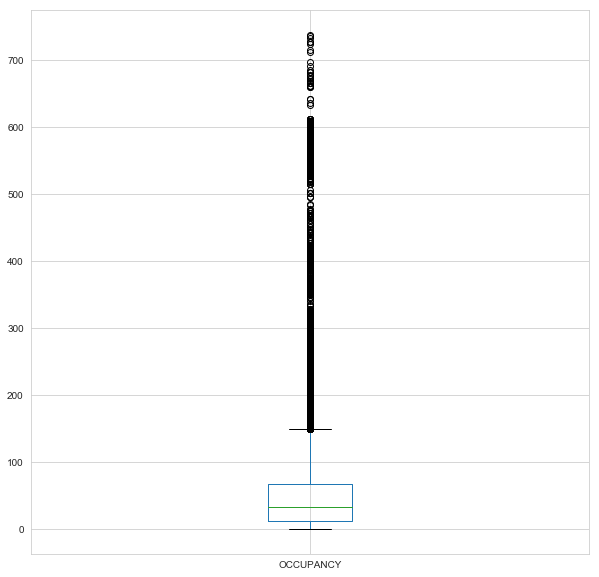

In [31]:
df.boxplot(column='OCCUPANCY')

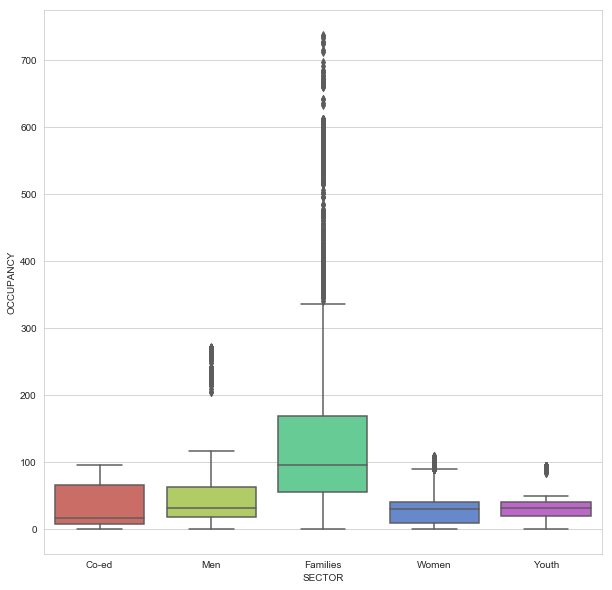

In [32]:
sns.boxplot(x='SECTOR', y='OCCUPANCY', data=df, palette='hls')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


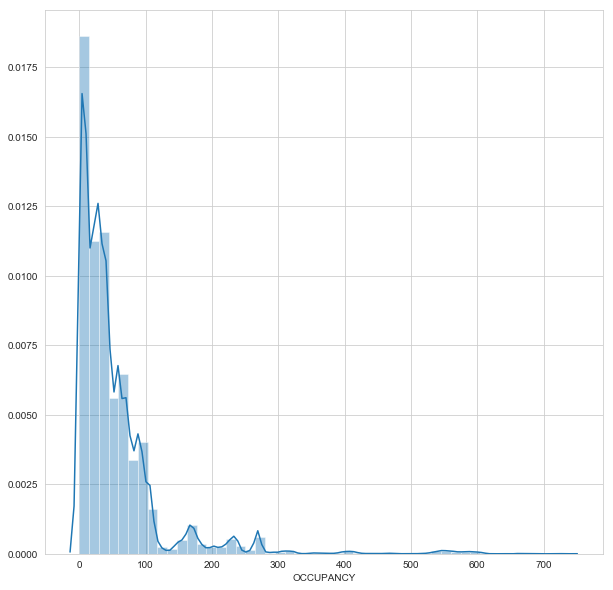

In [33]:
sns.distplot(df.OCCUPANCY)

(array([5.9016e+04, 1.0401e+04, 2.6060e+03, 1.7080e+03, 2.6200e+02,
        2.1900e+02, 4.8000e+01, 4.0000e+02, 1.2100e+02, 2.5000e+01]),
 array([  0. ,  73.7, 147.4, 221.1, 294.8, 368.5, 442.2, 515.9, 589.6,
        663.3, 737. ]),
 <a list of 10 Patch objects>)

[]

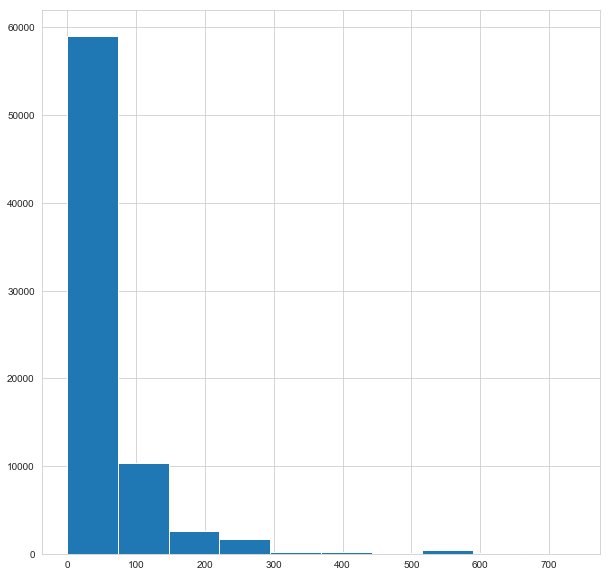

In [34]:
plt.hist(df.OCCUPANCY)
plt.plot()

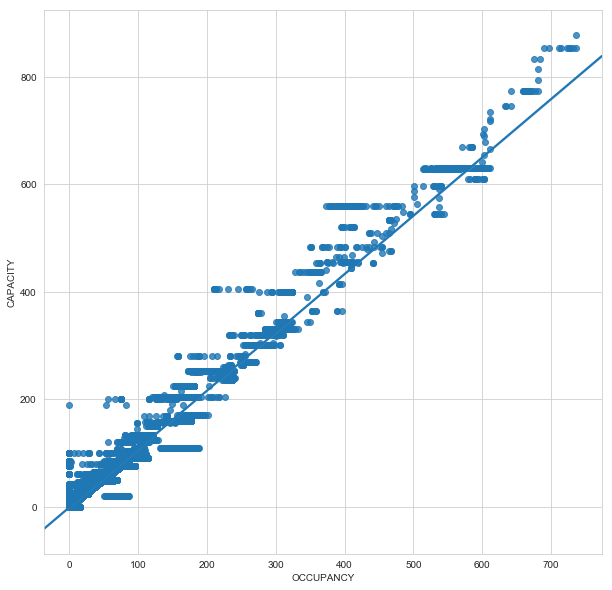

In [35]:
sns.regplot(x='OCCUPANCY', y='CAPACITY', data=df, scatter=True)

In [36]:
# Create an area plot by sector

coed = pd.Series(df.OCCUPANCY[df.SECTOR == 'Co-ed'])
men  = pd.Series(df.OCCUPANCY[df.SECTOR == 'Men'])
families = pd.Series(df.OCCUPANCY[df.SECTOR == 'Families'])
women = pd.Series(df.OCCUPANCY[df.SECTOR == 'Women'])
youth = pd.Series(df.OCCUPANCY[df.SECTOR == 'Youth'])

occ_date = pd.Series(df.OCCUPANCY_DATE)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

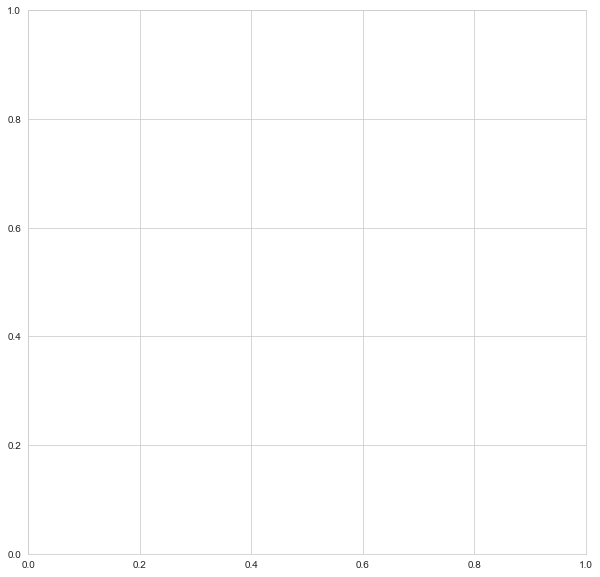

In [37]:
# Basic stacked area chart.
plt.stackplot(occ_date,men, women, youth, labels=['A','B','C'])
plt.legend(loc='upper left')

In [ ]:
df.plot(x = 'OCCUPANCY_DATE', y = 'OCCUPANCY', kind = 'area' )

In [ ]:
ax = sns.lineplot(x = 'OCCUPANCY_DATE', y = 'OCCUPANCY', data=df, hue = 'SECTOR')

### Create separate dataframes by sector and aggregate by day

In [ ]:
df.SECTOR.value_counts()

In [ ]:
df_men = df[df['SECTOR'] == 'Men']
df_men.head()

In [ ]:
# drop all the variables except fpr OCCUPANCY_DATE and OCCUPANCY
featured_variables =  ['OCCUPANCY_DATE','OCCUPANCY']

In [ ]:
df_men = df_men[featured_variables]

In [ ]:
df_men.head(n=10)
df_men.dtypes

In [ ]:
# group by occupancy_date
df_men_grp = df_men.groupby(['OCCUPANCY_DATE'], as_index=True).agg('sum').reset_index()
df_men_grp.head(10)
df_men_grp.dtypes

### Set the index as the time variable

In [ ]:
df_men_grp['OCCUPANCY_DATE'] = pd.to_datetime(df_men_grp['OCCUPANCY_DATE'])
df_men_grp.dtypes

In [ ]:
df_men_grp.set_index('OCCUPANCY_DATE', inplace=True)
df_men_grp.dtypes

In [ ]:
#check datatype of index
df_men_grp.head(10)
df_men_grp.index

In [ ]:
#convert to time series:
ts = df_men_grp['OCCUPANCY'].dropna()
ts.head(10)
ts.dtypes